In [2]:
# necessary imports

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

## SF data

In [3]:
# Acquire the data

sf_df = data.sf_temps()

In [4]:
# Check out the data

sf_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature

In [5]:
# Convert to datetime 

sf_df.date = pd.to_datetime(sf_df.date, format='%Y-%m-%d %I-%p')

In [6]:
# Make date the index

sf_df = sf_df.set_index('date').sort_index()

In [7]:
# Resample by day, find the average temp

sf_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


### 2. Write the code necessary to visualize the minimum temperature over time.

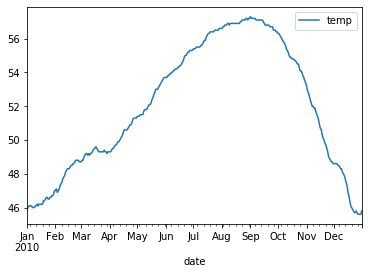

In [8]:
# Plot the min temps

sf_df.resample('D').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

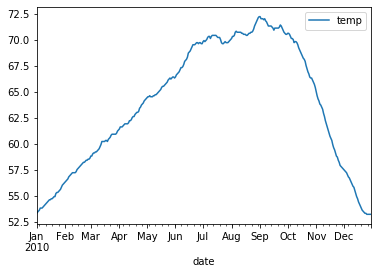

In [9]:
# Plot the max temps

sf_df.resample('D').max().plot()

### 4. Which month is the coldest, on average?

In [10]:
# Resampling by month, sort by the coldest avg

sf_df.resample('M').min().sort_values('temp')

,temp
date,
2010-12-31,45.6
2010-01-31,45.8
2010-02-28,46.9
2010-11-30,48.6
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-10-31,53.4
2010-06-30,53.7


### 5. Which month has the highest average temperature?

In [11]:
# Sort by the highest avg temps per month

sf_df.resample('M').max().sort_values('temp', ascending=False)

,temp
date,
2010-08-31,72.2
2010-09-30,72.2
2010-10-31,70.6
2010-07-31,70.4
2010-06-30,69.7
2010-05-31,66.4
2010-11-30,65.0
2010-04-30,64.3
2010-03-31,61.3


### 6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
# Calculating the appropriate columns

min_max_day = pd.DataFrame(sf_df.resample('D').agg(['min', 'max', 'mean']))
min_max_day.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [13]:
# Calculate the change

min_max_day['change'] = sf_df.resample('D').max() - sf_df.resample('D').min()
min_max_day.head()

temp                  change
             min   max       mean       
date                                    
2010-01-01  45.8  53.3  49.170833    7.5
2010-01-02  46.0  53.4  49.304167    7.4
2010-01-03  46.1  53.5  49.391667    7.4
2010-01-04  46.1  53.6  49.445833    7.5
2010-01-05  46.1  53.8  49.491667    7.7

In [14]:
# Find the month with the highest change

min_max_day.resample('M').change.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change, dtype: float64

### Seattle data

In [15]:
# import seattle data

sea_df = data.seattle_weather()

In [16]:
sea_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
# Convert to datetime 

sea_df.date = pd.to_datetime(sea_df.date, format='%Y-%m-%d')

In [18]:
# Make date the index

sea_df = sea_df.set_index('date').sort_index()

In [19]:
# Take a look at the data

sea_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [20]:
# Resample by month, find the highest precipitation 

sea_df.resample('M')[['precipitation']].sum().sort_values('precipitation', ascending=False).head()

,precipitation
date,
2015-12-31,284.5
2014-03-31,240.0
2015-11-30,212.6
2012-11-30,210.5
2012-03-31,183.0


### 2. Visualize the amount of monthly precipitation over time.

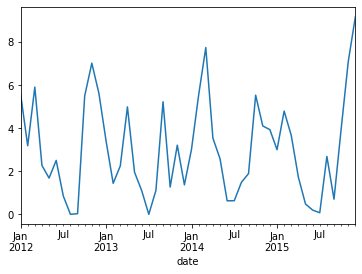

In [21]:
# Resample by month, plot the avg rainfall

sea_df.resample('M').mean().precipitation.plot(label = 'Monthly')

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

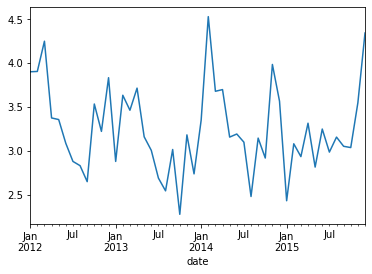

In [22]:
# Resample by month, plot the avg windspeed

sea_df.resample('M').mean().wind.plot(label = 'Monthly')

### 4. Which year-month combination is the windiest?

In [23]:
# Wind average

sea_df.resample('M')[['wind']].sum().sort_values('wind', ascending=False).head()

,wind
date,
2015-12-31,134.6
2012-03-31,131.7
2014-02-28,126.8
2012-01-31,120.9
2014-11-30,119.5


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [24]:
# Make a new column 'is_sunny'

sea_df['is_sunny'] = sea_df.weather == 'sun'
sea_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [48]:
# Resample for year, then find the average of is_sunny

sea_df.is_sunny.resample('Y').mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: is_sunny, dtype: float64

### 6. In which month does it rain the most?

In [27]:
# Create new column for month

sea_df['month'] = sea_df.index.month

In [28]:
# Total rainfall by month

sea_df.groupby('month').precipitation.sum().sort_values(ascending=False).head()

month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [29]:
# Create new column for did_rain

sea_df['did_rain'] = sea_df.precipitation > 0

In [31]:
# Sort by highest avg rainfall and by month

sea_df.groupby('month').did_rain.mean().sort_values(ascending=False).head()

month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
Name: did_rain, dtype: float64

### Flights data

In [33]:
# Acquire the data

f_df = data.flights_20k()

In [34]:
# Take a look at the data

f_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [35]:
# Convert to datetime 

f_df.date = pd.to_datetime(f_df.date, format='%Y-%m-%d %I-%p')

In [36]:
# Make date the index

f_df = f_df.set_index('date').sort_index()

In [37]:
f_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 1. Convert any negative delays to 0.

In [38]:
# Convert negative delays to 0 using del_replace

del_replace = f_df[f_df.delay < 0]
f_df.loc[f_df.delay < 0, "delay"] = 0
f_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

In [39]:
# Make a new column 'hour'

f_df['hour'] = f_df.index.hour

f_df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [41]:
# Groupby by 'hour' and look at mean delay:

f_df.groupby('hour').delay.mean().sort_values(ascending=False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?

In [42]:
# Make a new column 'week_day'

f_df['week_day'] = f_df.index.day_name()
f_df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [44]:
# Groupby the weekday and sort by mean delay

f_df.groupby('week_day').delay.mean().sort_values(ascending=False).head()

week_day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?

In [45]:
# Create a new column 'month'


f_df['month'] = f_df.index.month
f_df.head()

,delay,distance,origin,destination,hour,week_day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,1
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,1
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,1


In [46]:
# Groupby month and sort by delay

f_df.groupby('month').delay.mean().sort_values(ascending=False).head()

month
2    12.306106
1    11.301592
3     9.875287
Name: delay, dtype: float64